In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [12]:
# 1. 데이터 불러오기 및 필터링
df = pd.read_csv("./data/train (1).csv")  # 경로는 본인 환경에 맞게
success_df = df[df["success_label"] == 1]  # 성공작만 추출

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_45932/3250090303.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


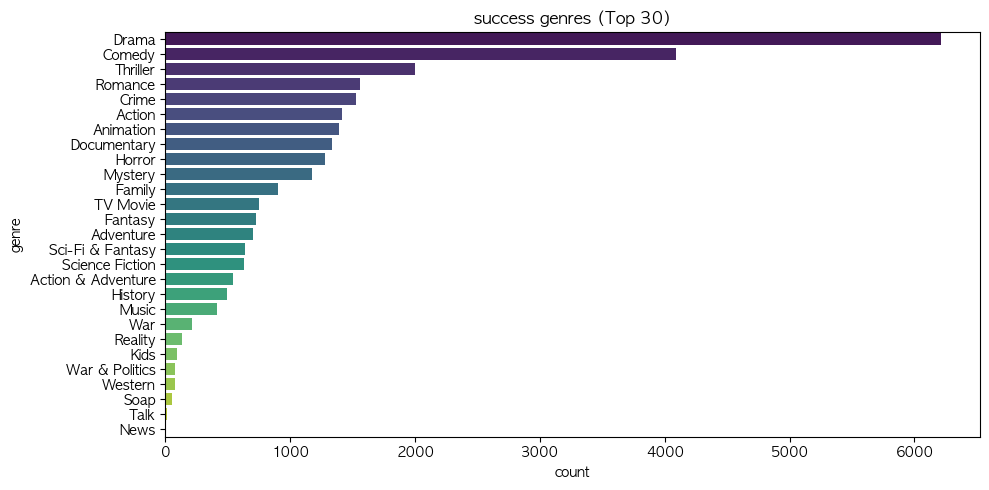

In [13]:
# 장르 분포
genre_counts = success_df["genre"].dropna().str.split(', ').explode().value_counts().head(30)
plt.figure(figsize=(10, 5))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title("success genres (Top 30)")
plt.xlabel("count")
plt.ylabel("genre")
plt.tight_layout()
plt.show()

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_45932/634650986.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='magma')


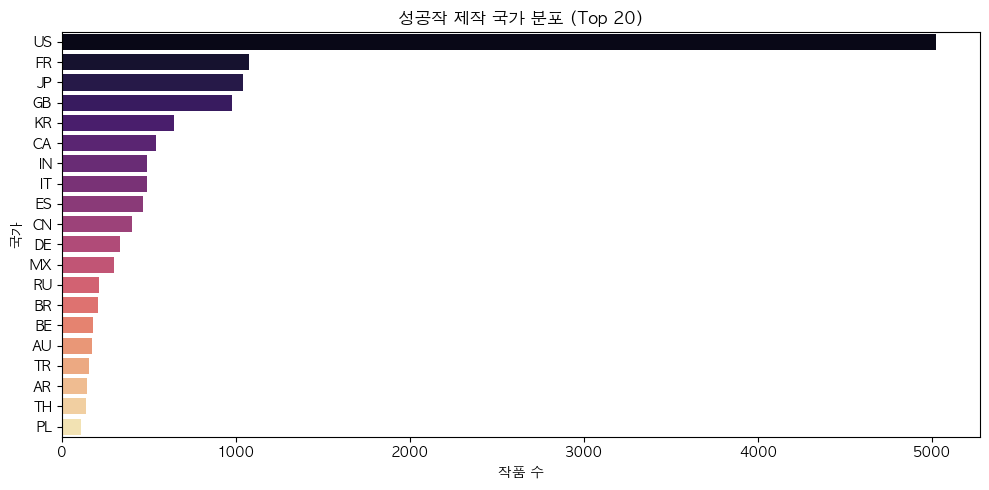

In [15]:
# 국가 분포(top 20)
country_counts = success_df["country"].dropna().str.split(', ').explode().value_counts().head(20)
plt.figure(figsize=(10, 5))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='magma')
plt.title("성공작 제작 국가 분포 (Top 20)")
plt.xlabel("작품 수")
plt.ylabel("국가")
plt.tight_layout()
plt.show()

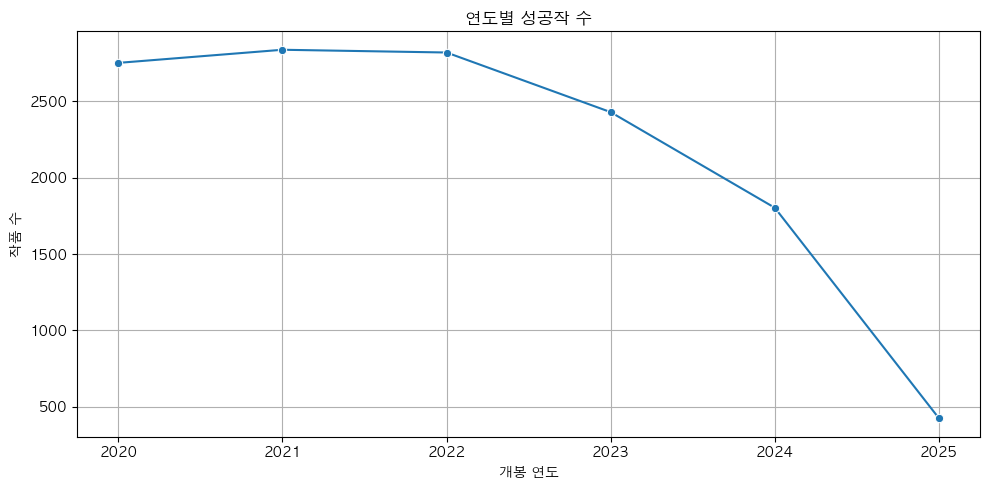

In [16]:
# 연도별 성공 작 수
year_counts = success_df["year"].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o')
plt.title("연도별 성공작 수")
plt.xlabel("개봉 연도")
plt.ylabel("작품 수")
plt.grid(True)
plt.tight_layout()
plt.show()

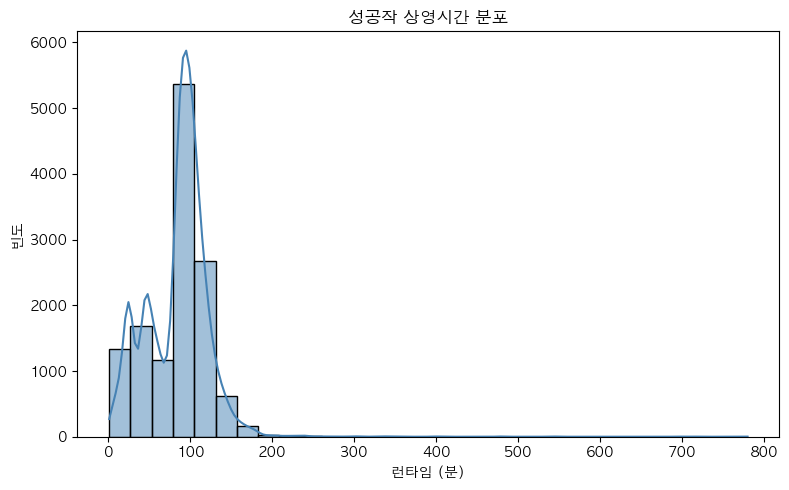

In [17]:
# 상영 시간 분포
plt.figure(figsize=(8, 5))
sns.histplot(success_df["runtime"].dropna(), bins=30, kde=True, color='steelblue')
plt.title("성공작 상영시간 분포")
plt.xlabel("런타임 (분)")
plt.ylabel("빈도")
plt.tight_layout()
plt.show()

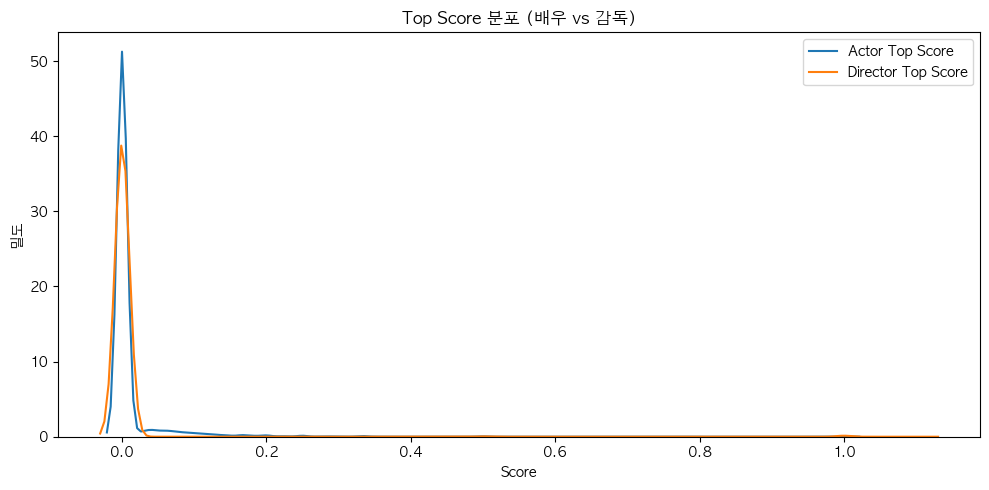

In [18]:
# 배우/감독 top-score 분포
plt.figure(figsize=(10, 5))
sns.kdeplot(success_df["actor_top_score"], label='Actor Top Score')
sns.kdeplot(success_df["director_top_score"], label='Director Top Score')
plt.title("Top Score 분포 (배우 vs 감독)")
plt.xlabel("Score")
plt.ylabel("밀도")
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_45932/1040592185.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette='coolwarm')


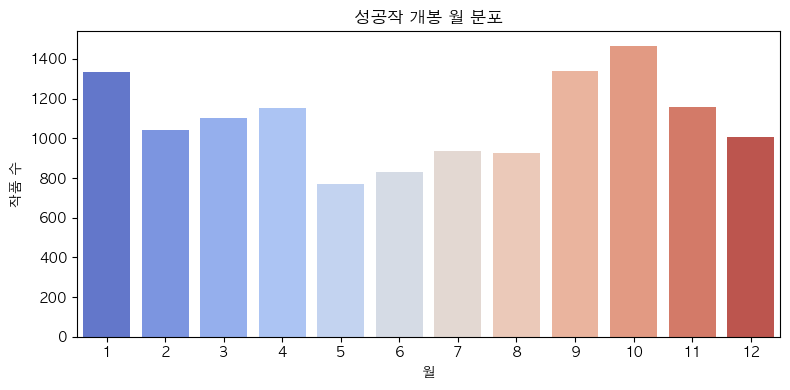

In [19]:
# 개봉 월 분포(성공작중)
month_counts = success_df["month"].value_counts().sort_index()
plt.figure(figsize=(8, 4))
sns.barplot(x=month_counts.index, y=month_counts.values, palette='coolwarm')
plt.title("성공작 개봉 월 분포")
plt.xlabel("월")
plt.ylabel("작품 수")
plt.tight_layout()
plt.show()

In [23]:
# 감독 vs 배우 영향력 비교
features = ["actor_top_score", "director_top_score"]
stats_df = pd.DataFrame({
    "Feature": [],
    "Statistic": [],
    "Value": []
})

for feature in features:
    stats_df = pd.concat([
        stats_df,
        pd.DataFrame({
            "Feature": [feature],
            "Statistic": ["Mean"],
            "Value": [
                success_df[feature].mean()
            ]
        })
    ], ignore_index=True)

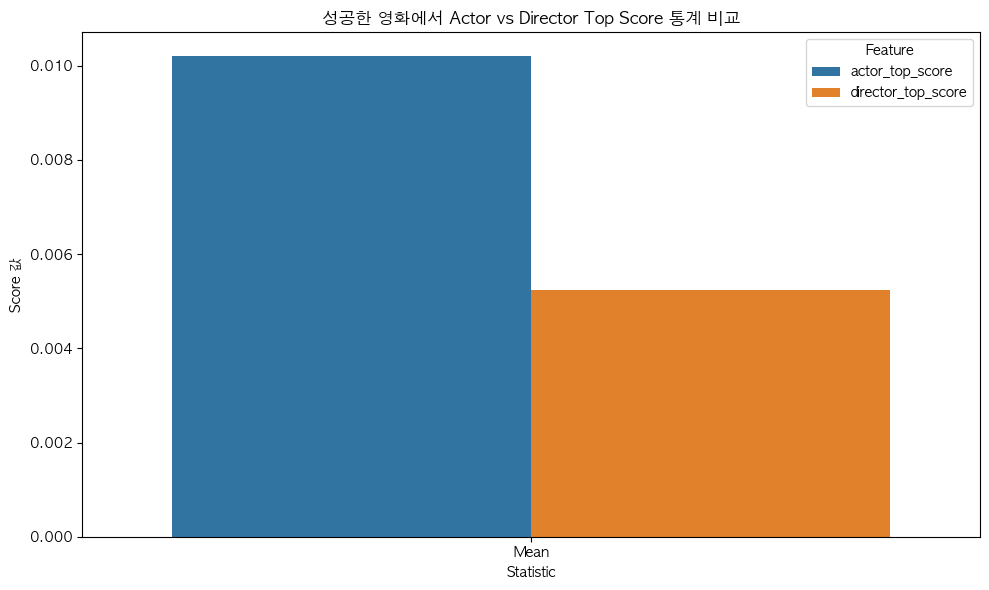

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(data=stats_df, x="Statistic", y="Value", hue="Feature")
plt.title("성공한 영화에서 Actor vs Director Top Score 통계 비교")
plt.ylabel("Score 값")
plt.tight_layout()
plt.show()

## 성공한 작품중에서는 감독의 영향력보다는 배우의 영향력이 더 큰것으로 확인이 됨

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_45932/1637532806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  success_df['runtime'] = pd.to_numeric(success_df['runtime'], errors='coerce')
/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_45932/1637532806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  success_df['imdb_rating'] = pd.to_numeric(success_df['imdb_rating'], errors='coerce')
/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_45932/1637532806.py:4: SettingWit

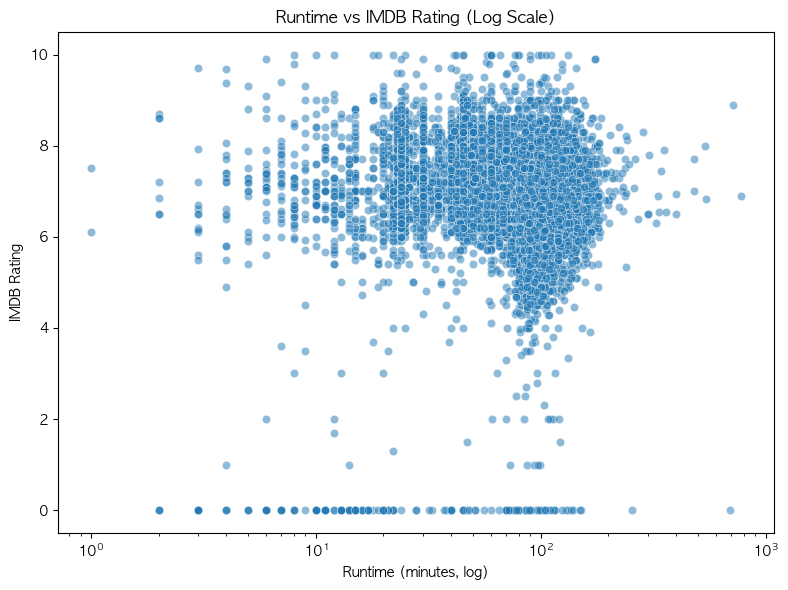

Text(0, 0.5, 'IMDB Rating')

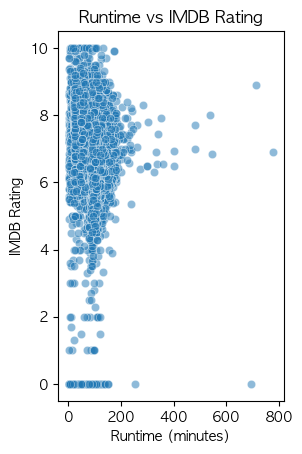

In [34]:
# 상영시간 vs imdb_rating
success_df['runtime'] = pd.to_numeric(success_df['runtime'], errors='coerce')
success_df['imdb_rating'] = pd.to_numeric(success_df['imdb_rating'], errors='coerce')
success_df['imdb_review_count'] = pd.to_numeric(success_df['imdb_review_count'], errors='coerce')

#로그 스케일
filtered_df = success_df[success_df["runtime"] > 0]
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_df, x="runtime", y="imdb_rating", alpha=0.5)
plt.xscale('log')  # X축 로그 스케일
plt.title("Runtime vs IMDB Rating (Log Scale)")
plt.xlabel("Runtime (minutes, log)")
plt.ylabel("IMDB Rating")
plt.tight_layout()
plt.show()

# 일반 스케일
plt.subplot(1, 2, 1)
sns.scatterplot(data=success_df, x='runtime', y='imdb_rating', alpha=0.5)
plt.title('Runtime vs IMDB Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDB Rating')

# 평점의 상관없이 대부분의 영화가 90-130분사이에 몰려있음을 확인, 크게 성공하지 못한 영화도 있으나 대부분의 성공한 영화는 런타임이 90-130분 사이인거로 확인이되었음

이상치 개수: 2


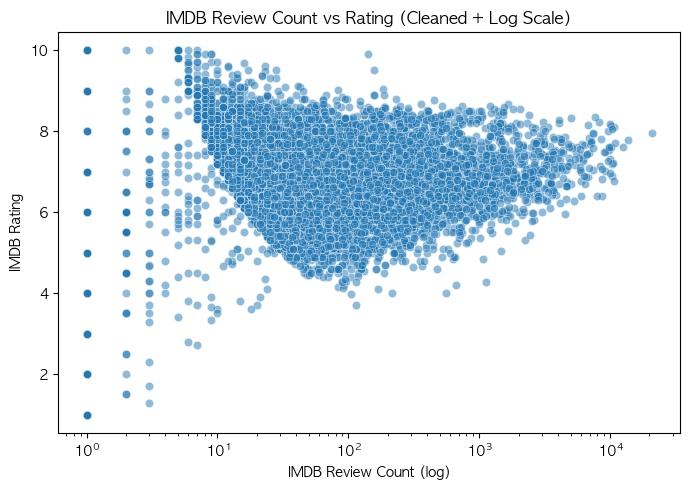

In [31]:
# imdb_review_count vs imdb_rating
# 리뷰 수가 0인데 평점이 존재하는 경우 확인
anomalies = success_df[(success_df['imdb_review_count'] == 0) & (success_df['imdb_rating'] > 0)]
print(f"이상치 개수: {len(anomalies)}")

# 이 조건을 만족하는 행 제거
success_df_cleaned = success_df[~((success_df['imdb_review_count'] == 0) & (success_df['imdb_rating'] > 0))]


plt.figure(figsize=(7, 5))
sns.scatterplot(data=filtered_df, x='imdb_review_count', y='imdb_rating', alpha=0.5)
plt.xscale('log')
plt.title("IMDB Review Count vs Rating (Cleaned + Log Scale)")
plt.xlabel("IMDB Review Count (log)")
plt.ylabel("IMDB Rating")
plt.tight_layout()
plt.show()

## 리뷰 수가 많을 수록 평점이 높거나 안정적이고 리뷰수가 적을수록 불안정한 패턴을 보이고 있음을 알 수 있다